In [1]:
from ZX_dualities import *
from utils.qec import *
from utils.qiskit import *
import pickle

## [[72,12,6]] 

#### Define code

In [2]:
n = 72
k = 12
d = 6

H_X = np.load(f'../code_data/HX_n{n}k{k}d{d}.npy')
H_Z = np.load(f'../code_data/HZ_n{n}k{k}d{d}.npy')

zeros = np.zeros_like(H_X)
H_symp = np.array(np.vstack((np.hstack((H_X,zeros)),np.hstack((zeros,H_Z)))),dtype=int)

In [3]:
H_symp_rref, _, transform_rows, transform_cols = rref_mod2(H_symp)
H_symp_rref = H_symp_rref[~np.all(H_symp_rref == 0, axis=1)]
H_symp_rref_og_basis = H_symp_rref@inverse(transform_cols)
assert H_symp_rref_og_basis.shape[0] == n-k
assert H_symp_rref_og_basis.shape[1] == 2*n

#### Standard form of code

In [4]:
G, LX, LZ, D = compute_standard_form(H_symp_rref_og_basis)
#print(binary_vecs_to_paulis(LX))

#### Automorphism group generators from MAGMA

In [5]:
code_auts_dict = qec_code_ZX_dualities_from_magma_with_intersection(n,k,d,H_symp_rref_og_basis).run(fileroot='./')
filename = f'./auts_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  864
Time:  0.08
No of aut gens:  7


#### Physical circuits of automorphism group generators

In [6]:
auts = code_auts_dict['auts']
physical_circuits = []
for num, aut in enumerate(auts):
    phys_act = physical_circ_of_ZX_duality(H_symp_rref_og_basis,aut)        
    phys_circ, phys_symp_mat = phys_act.circ()
    physical_circuits.append(phys_circ)

#### Logical circuits of automorphism group generators

In [7]:
auts = code_auts_dict['auts']
logical_circuits = []
symp_mats = []
for num, aut in enumerate(auts):
    logical_act = logical_circ_of_ZX_duality(H_symp_rref_og_basis,aut)   
    logical_circ, logical_symp_mat = logical_act.circ()
    symp_mats.append(logical_symp_mat)
    logical_circuits.append(logical_circ)

In [8]:
filename = f'./symp_mats_n{n}k{k}d{d}.pkl'
with open(filename, 'wb') as f:
    pickle.dump(symp_mats, f)

### Logical action 1

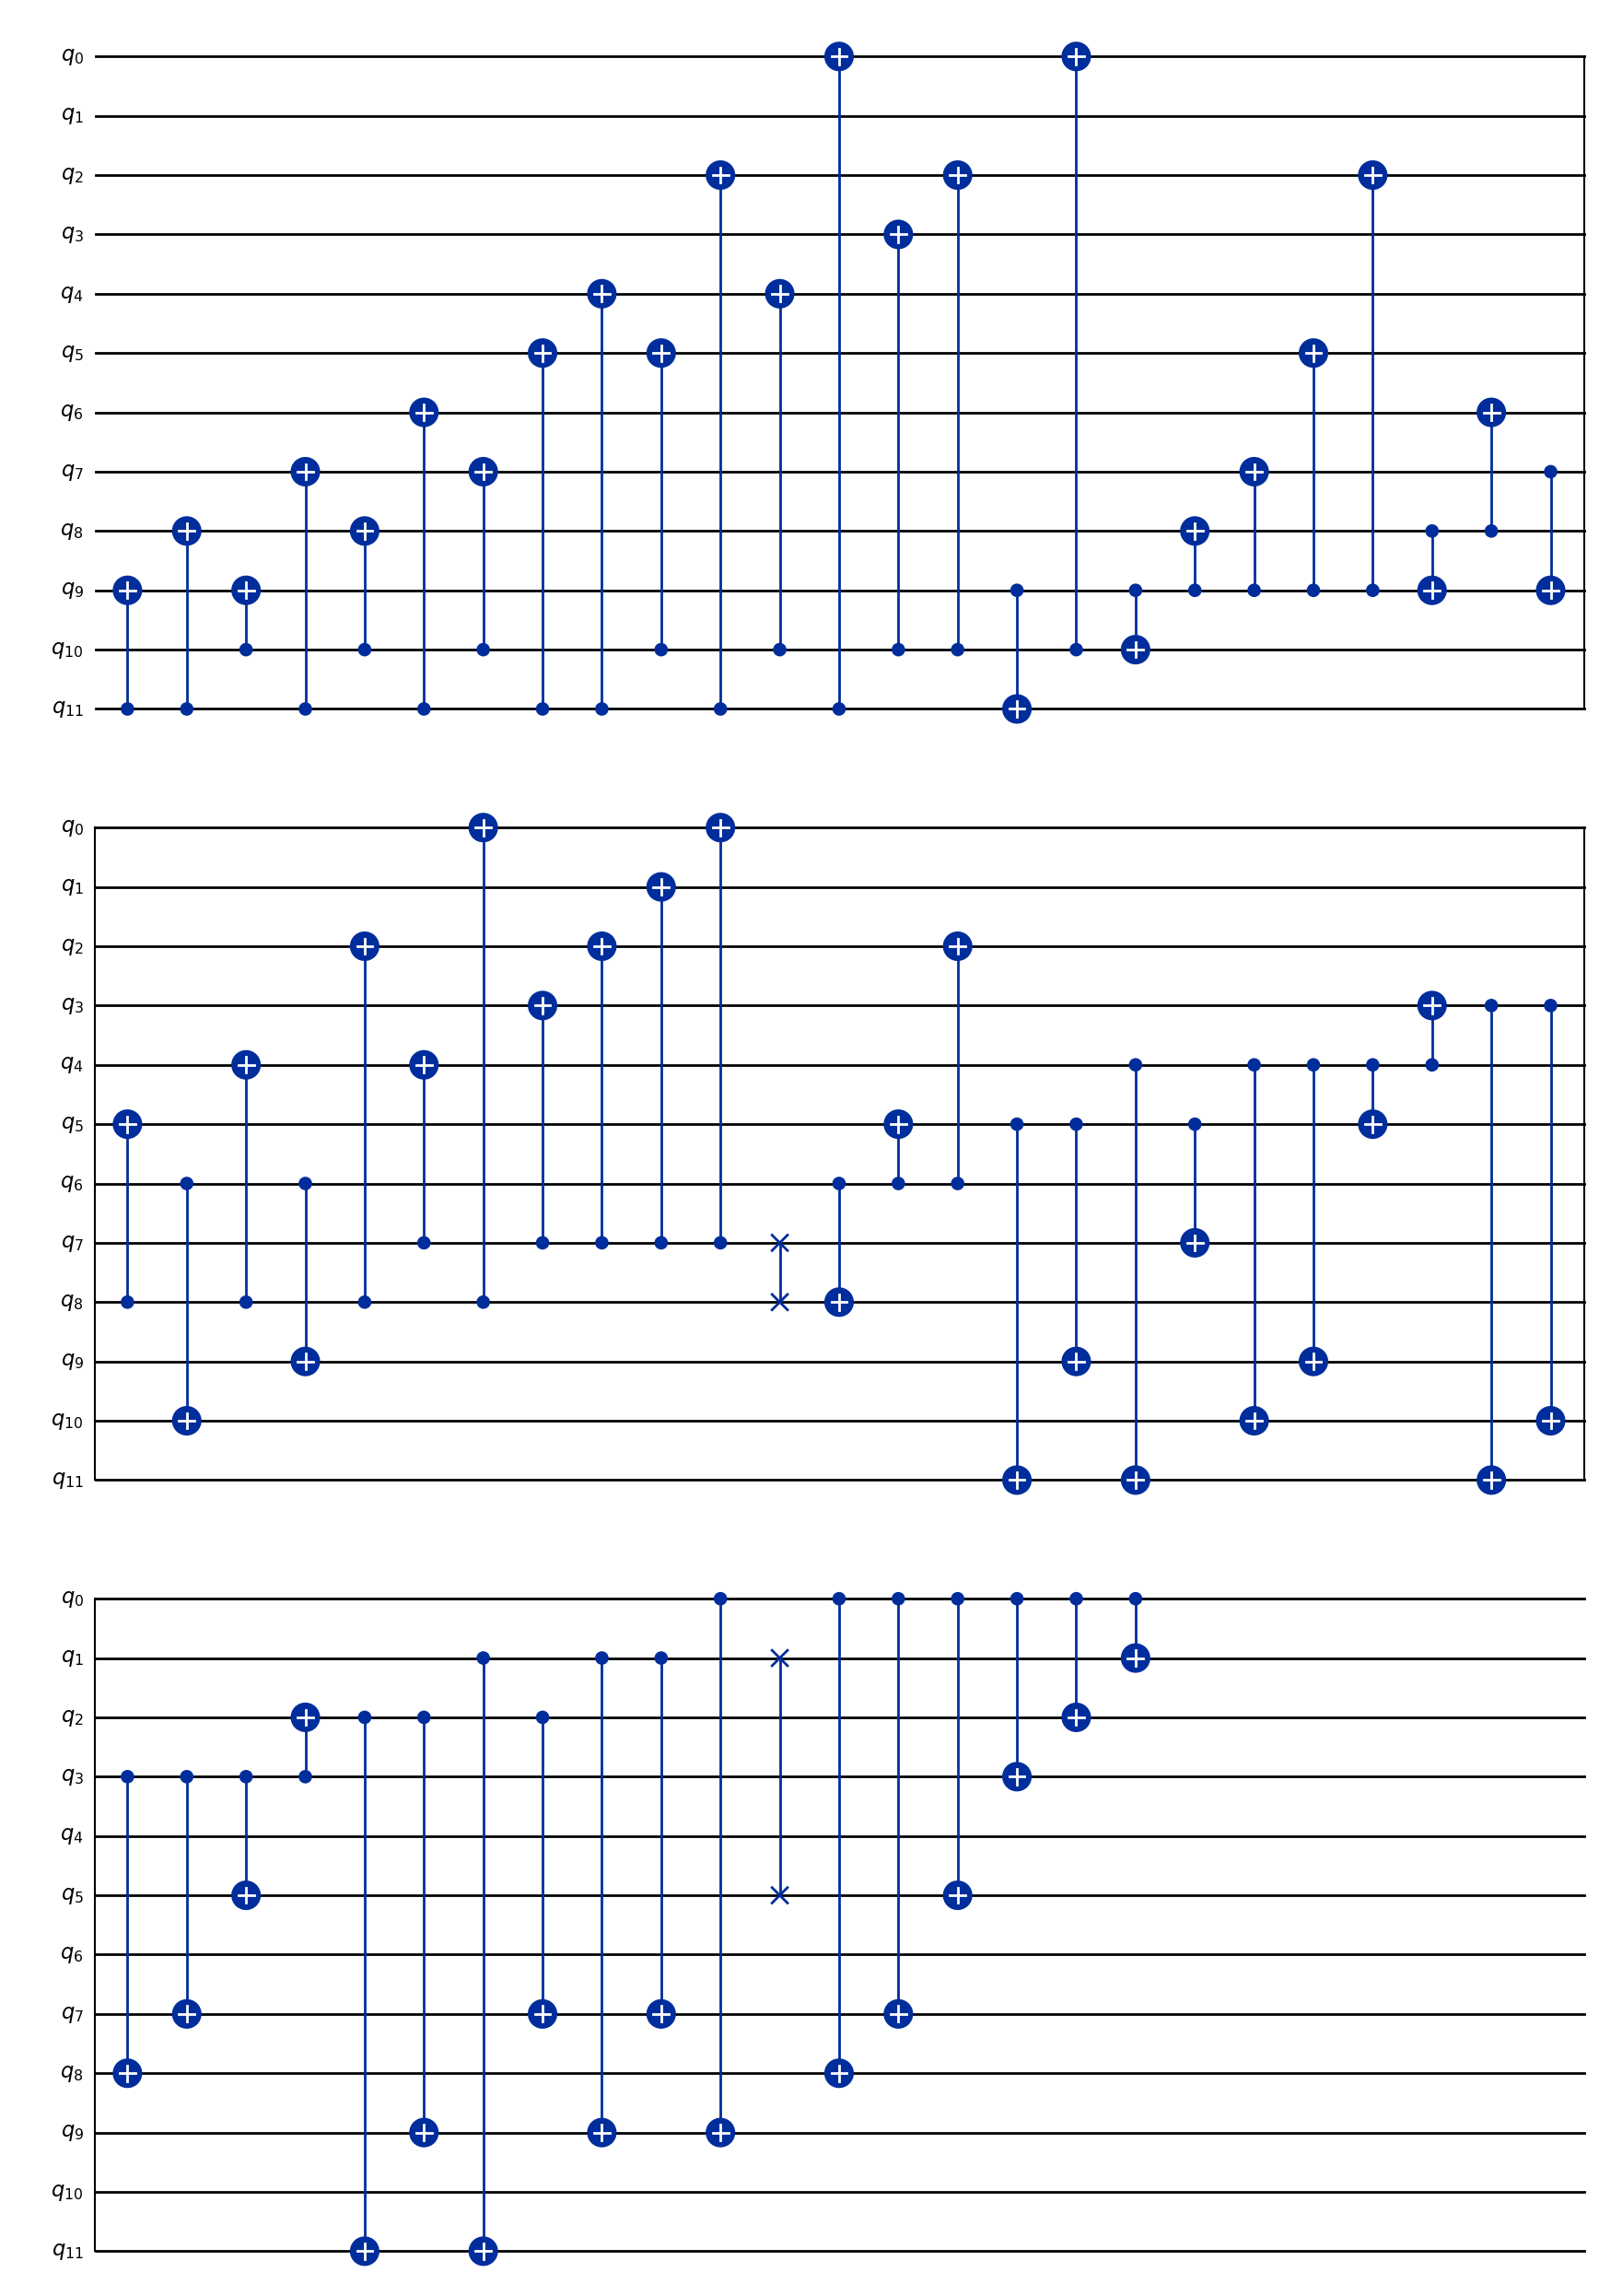

In [9]:
# logical circuit
qc = construct_circuit(logical_circuits[0], k)
qc.draw(output='mpl')

### Logical action 2

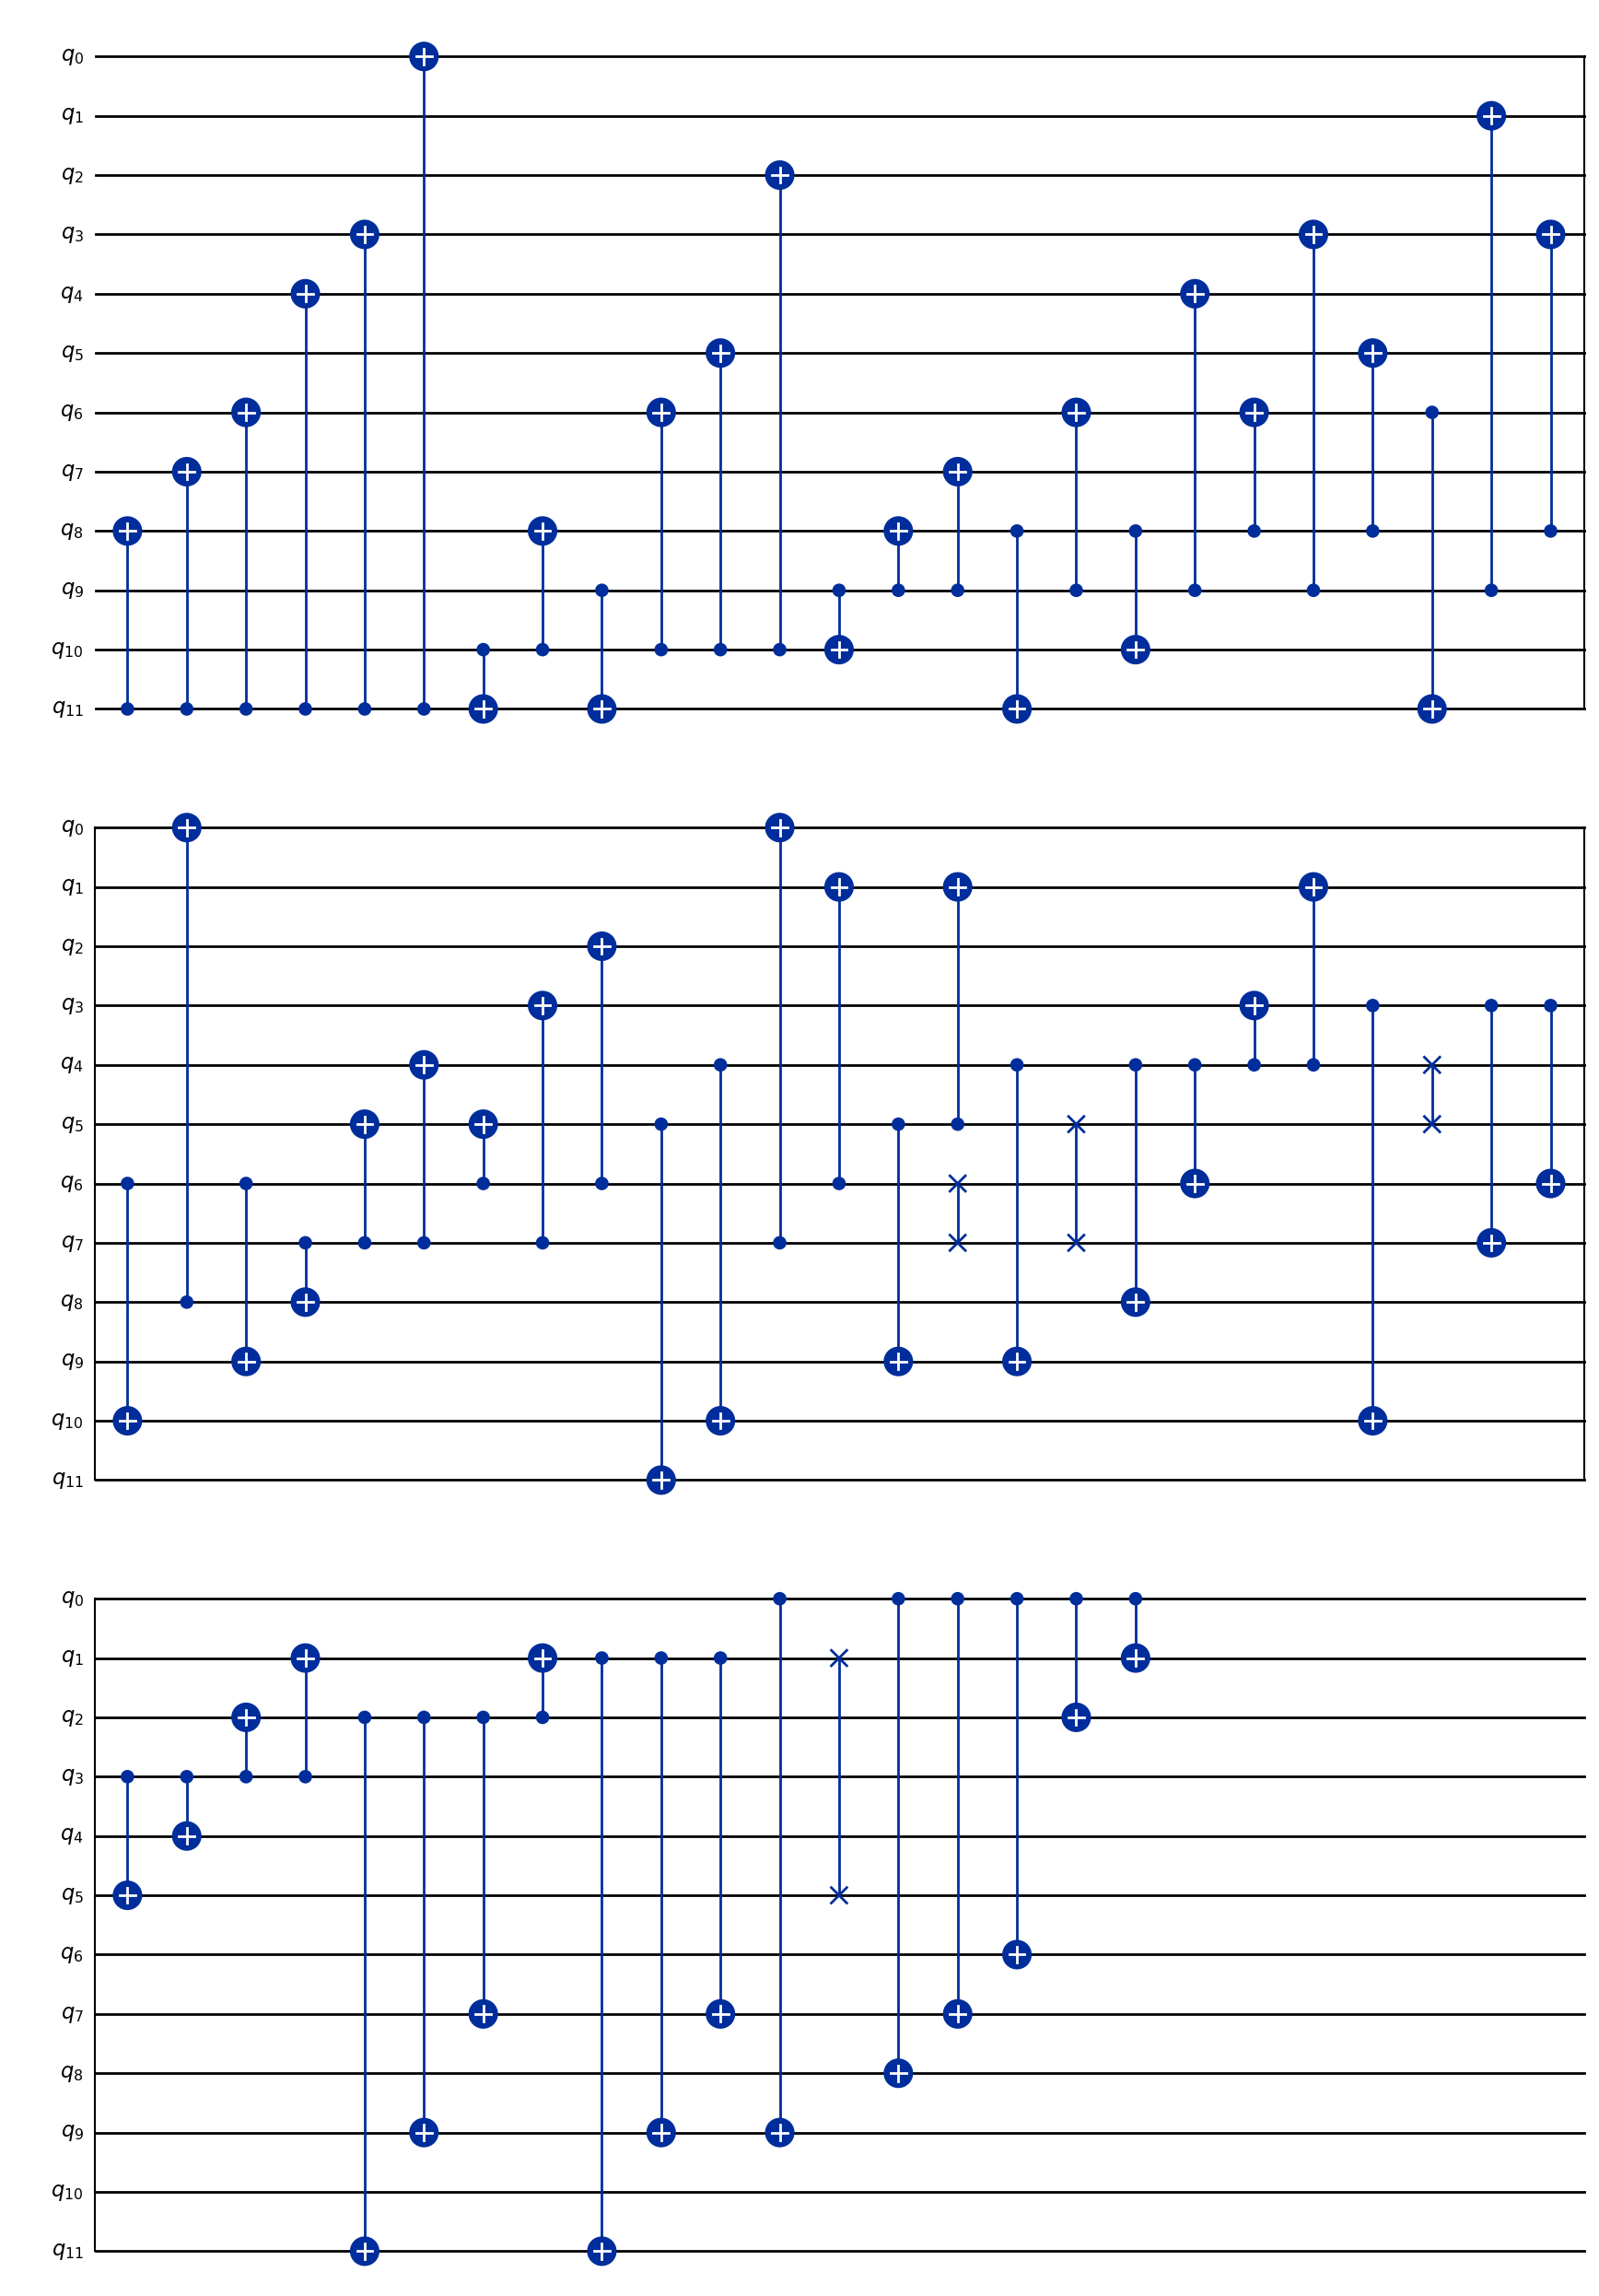

In [10]:
# logical circuit
qc = construct_circuit(logical_circuits[1], k)
qc.draw(output='mpl')

### Logical action 3

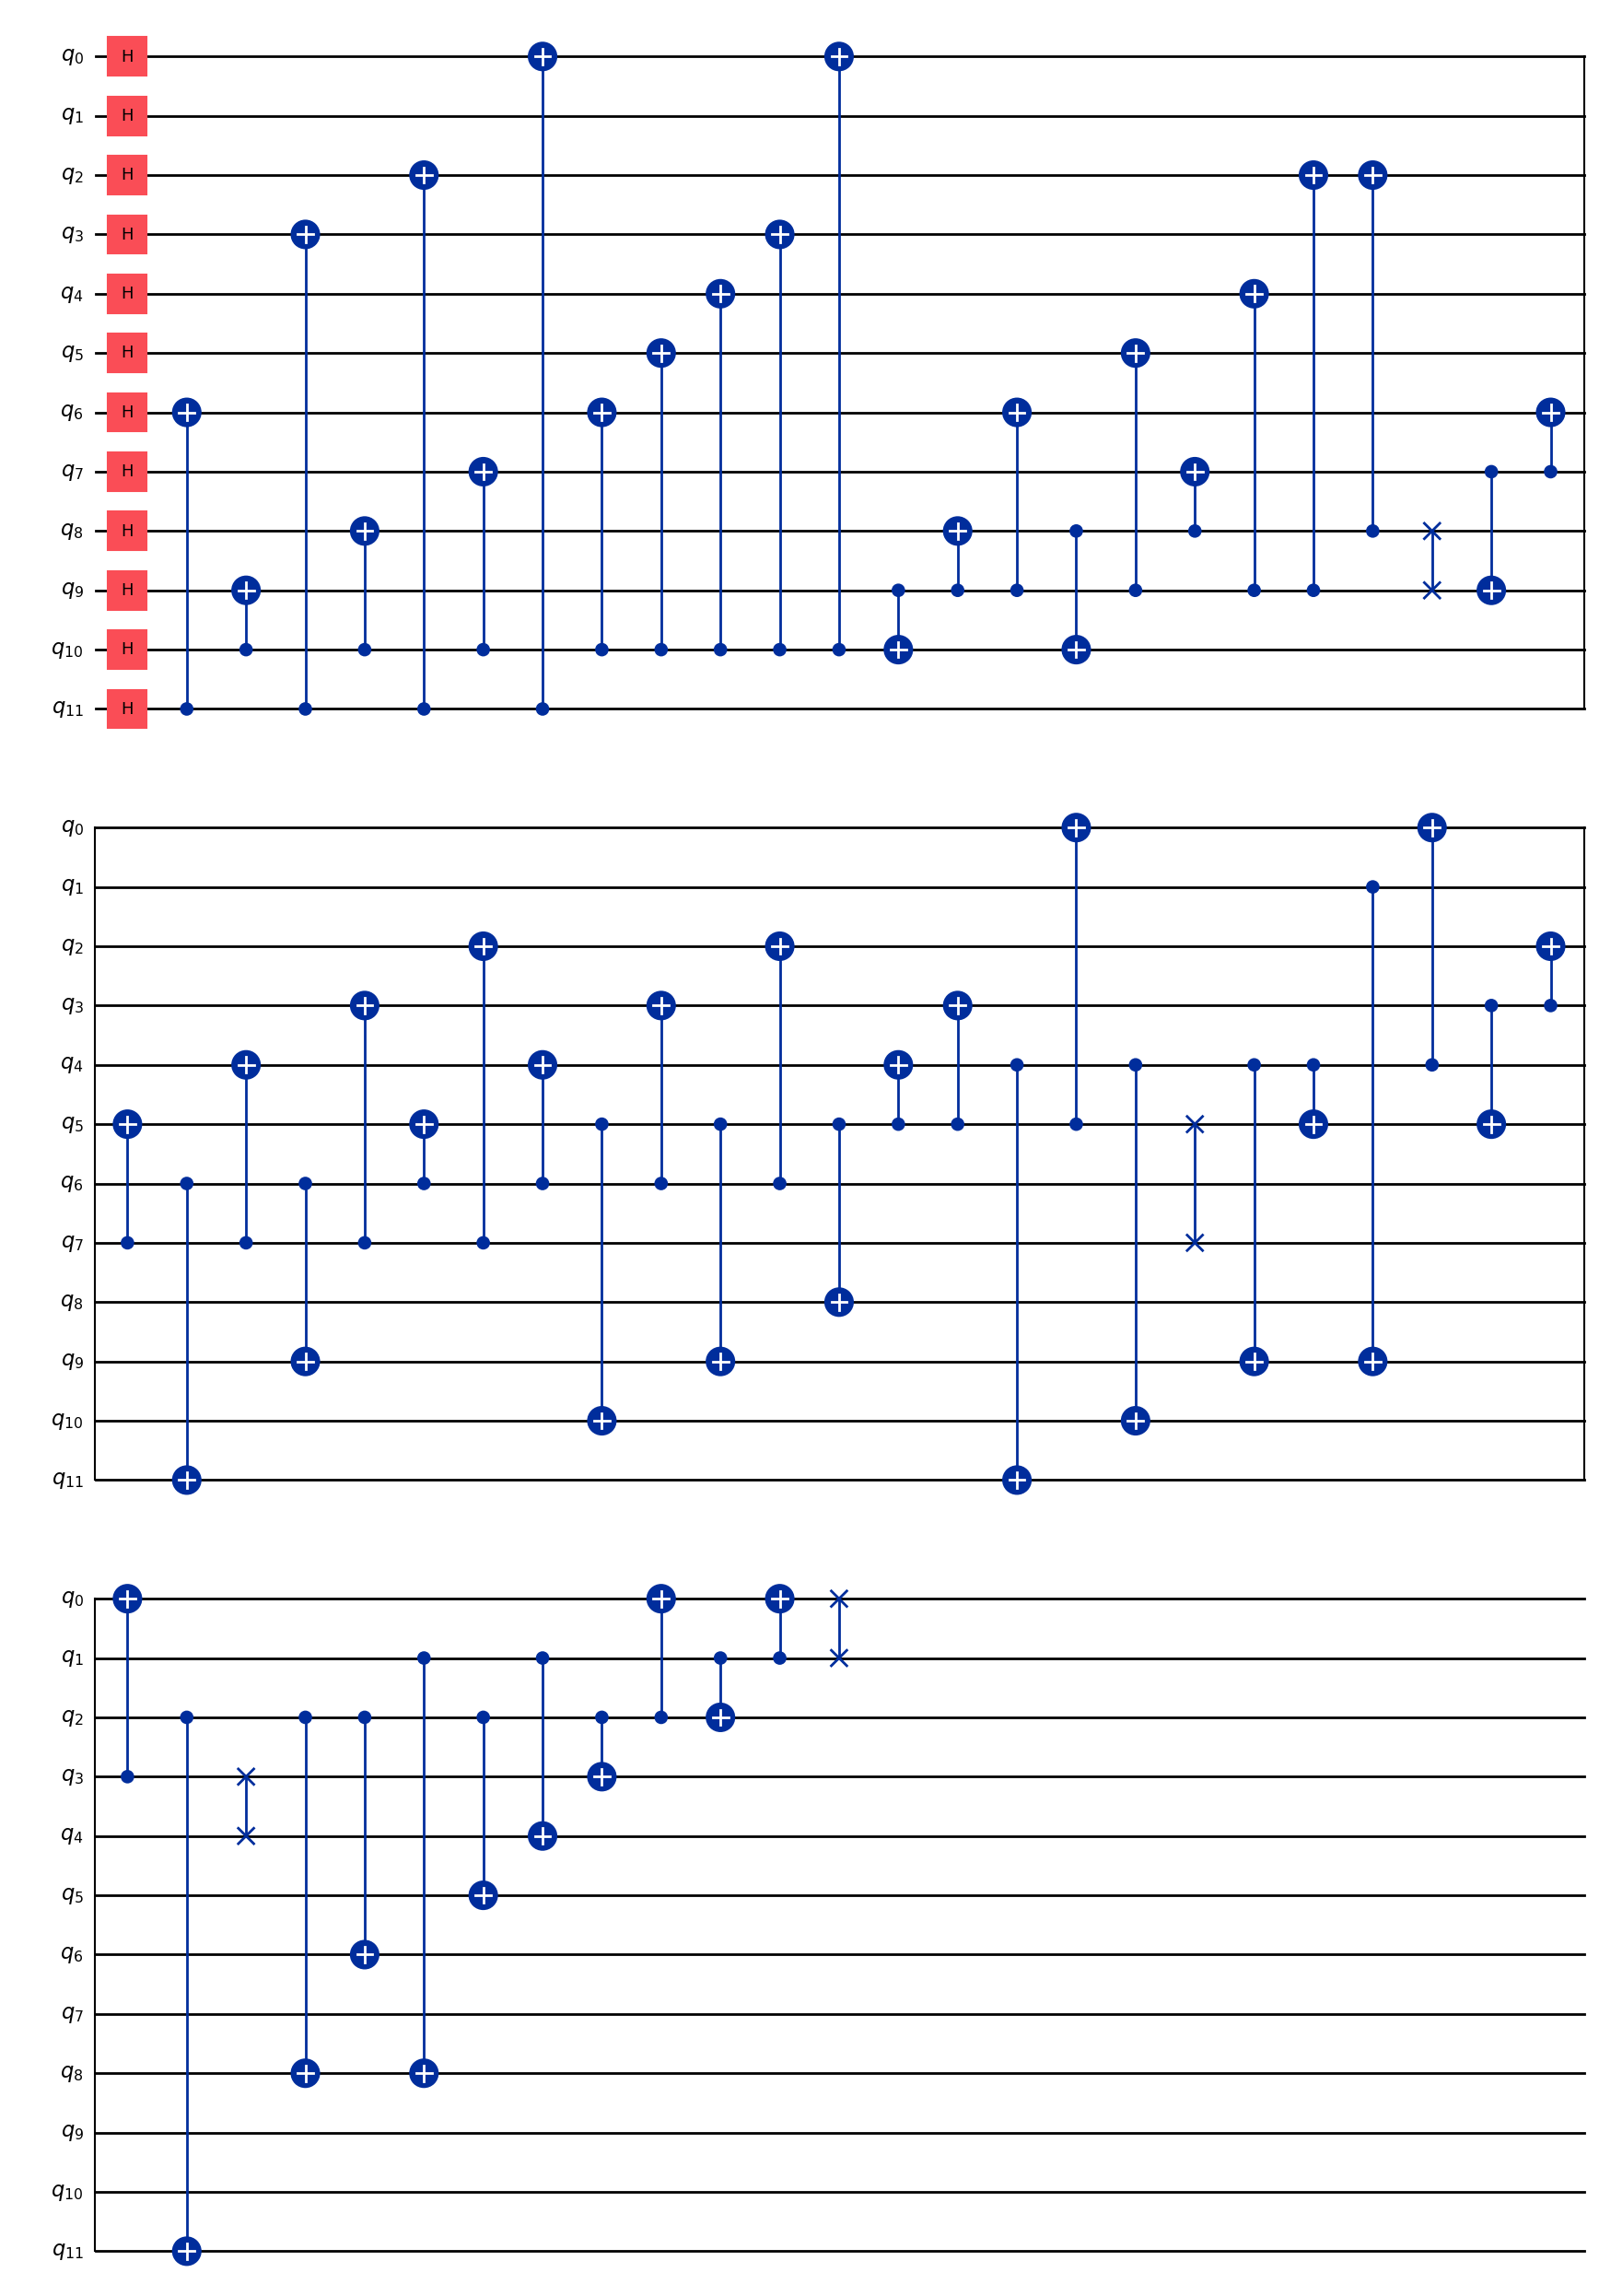

In [11]:
# logical circuit
qc = construct_circuit(logical_circuits[2], k)
qc.draw(output='mpl')

### Logical action 4

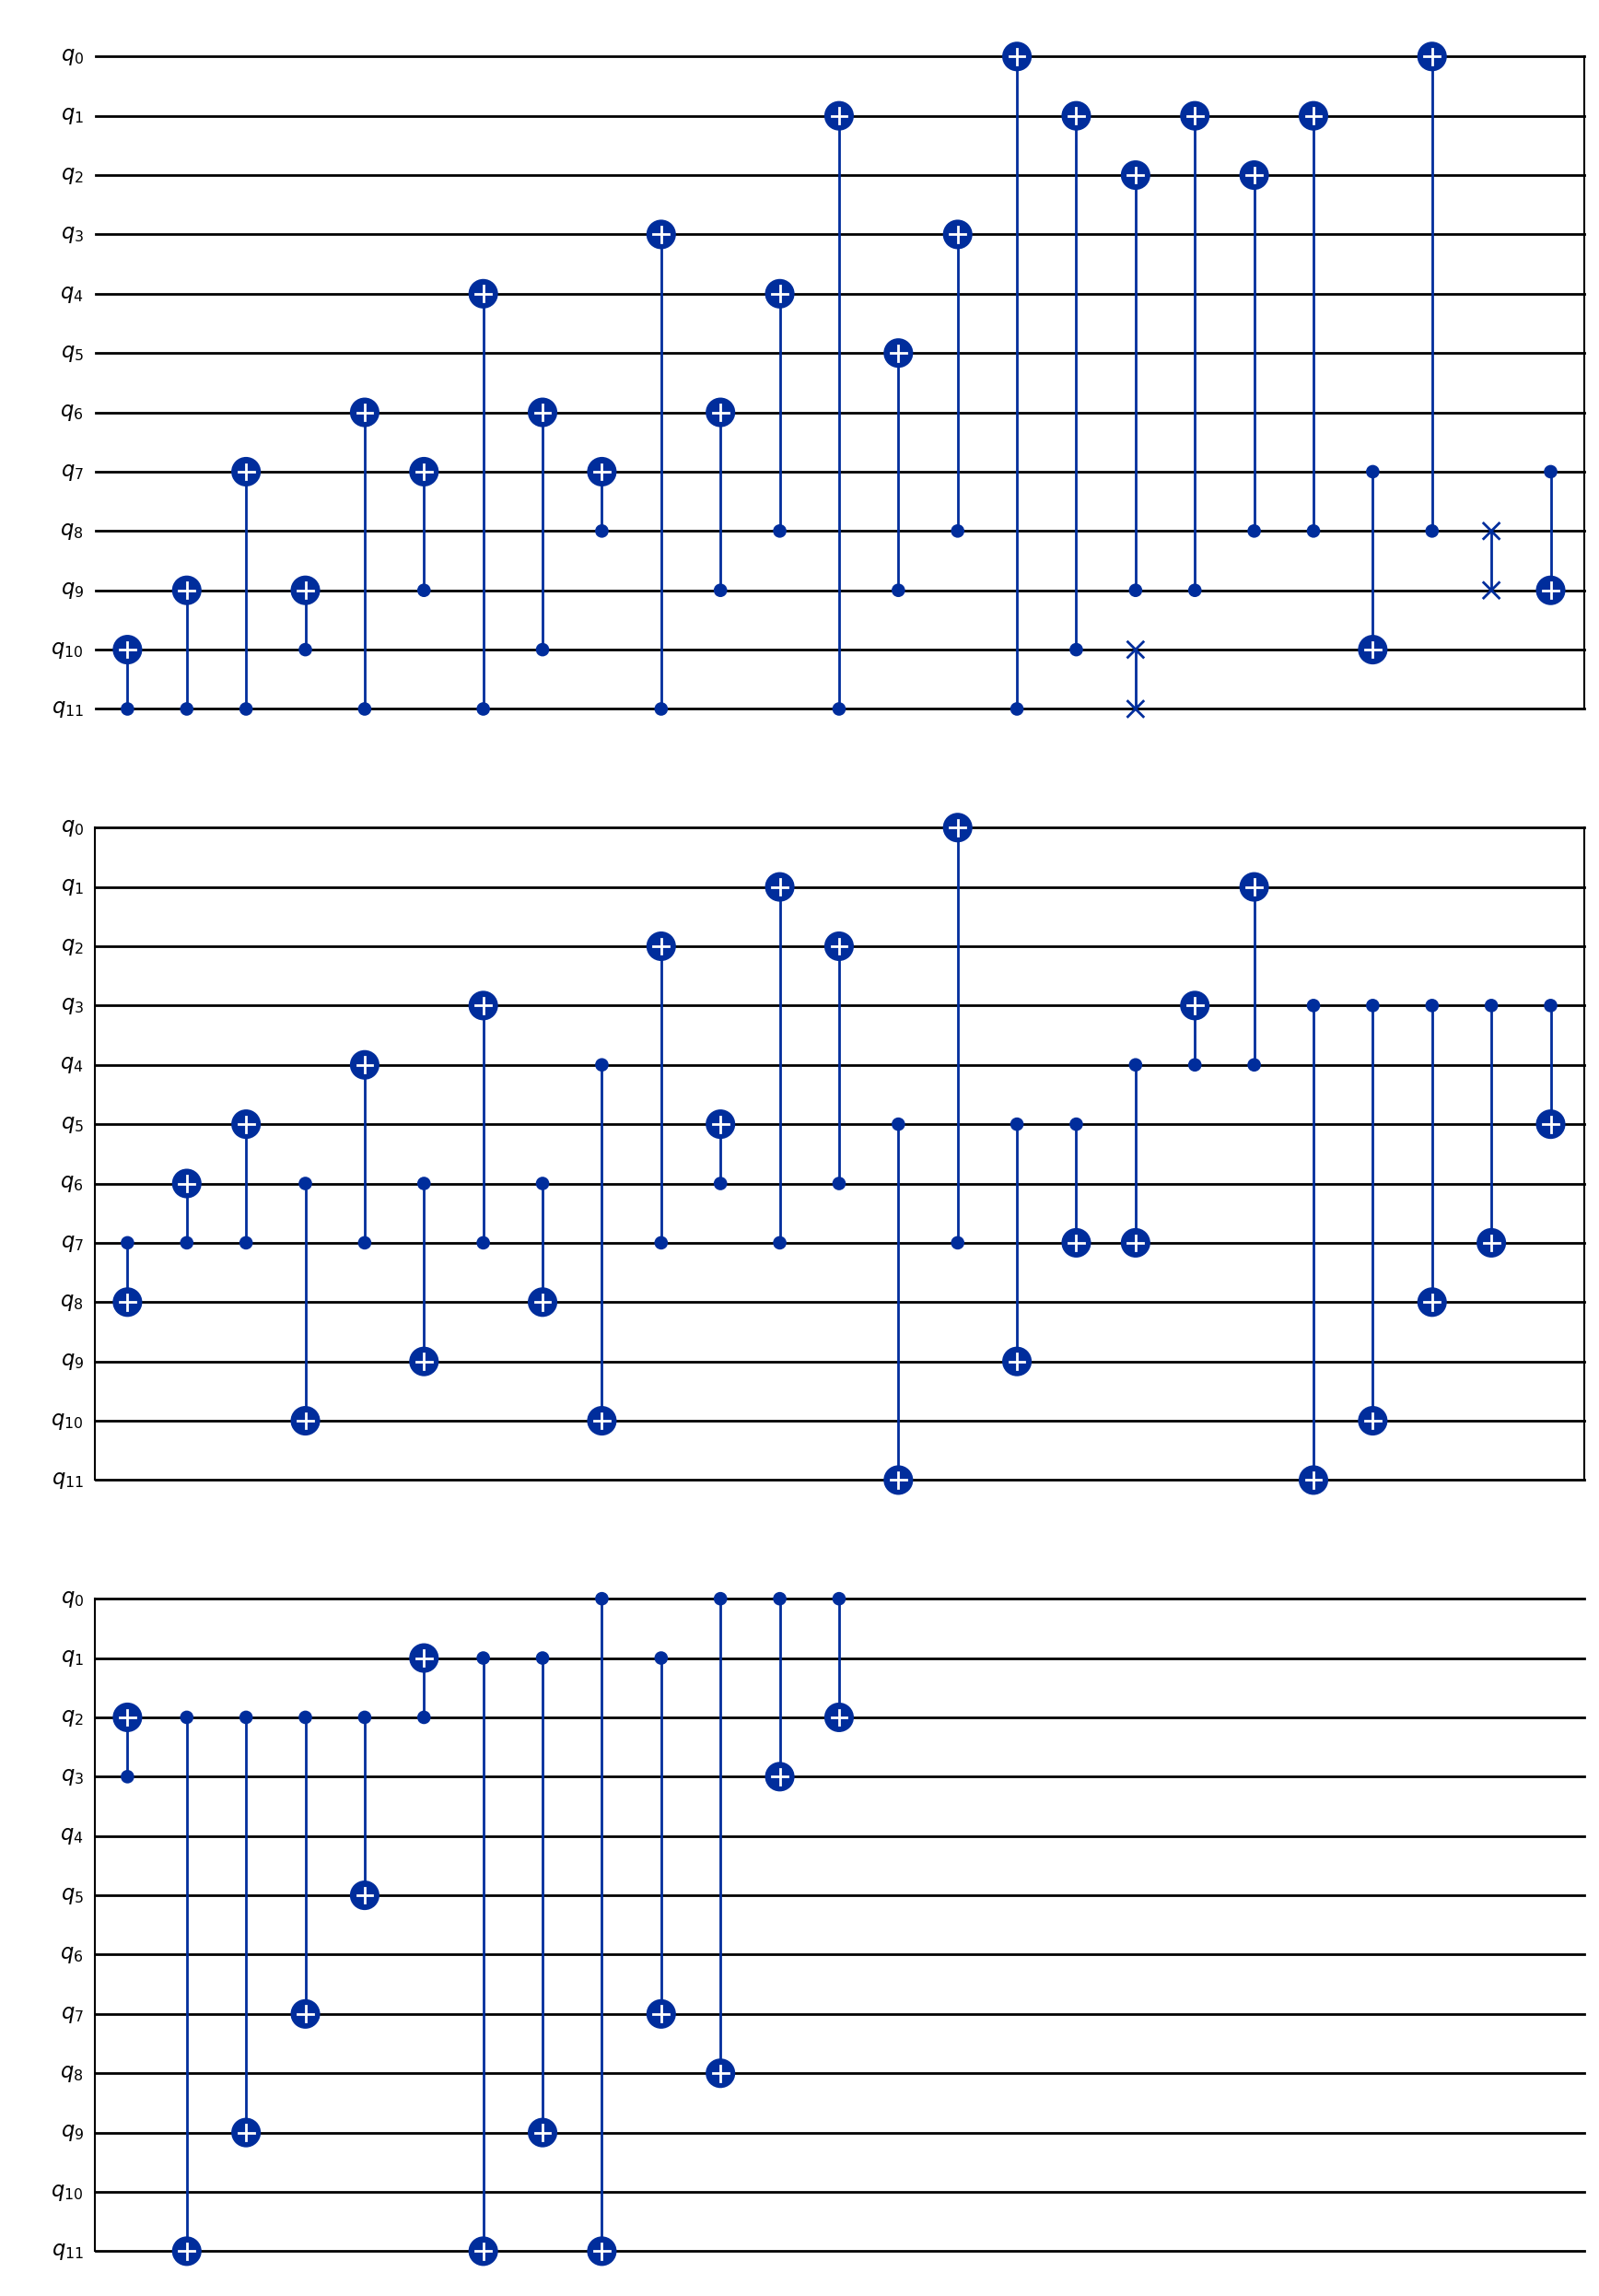

In [12]:
# logical circuit
qc = construct_circuit(logical_circuits[3], k)
qc.draw(output='mpl')

### Logical action 5

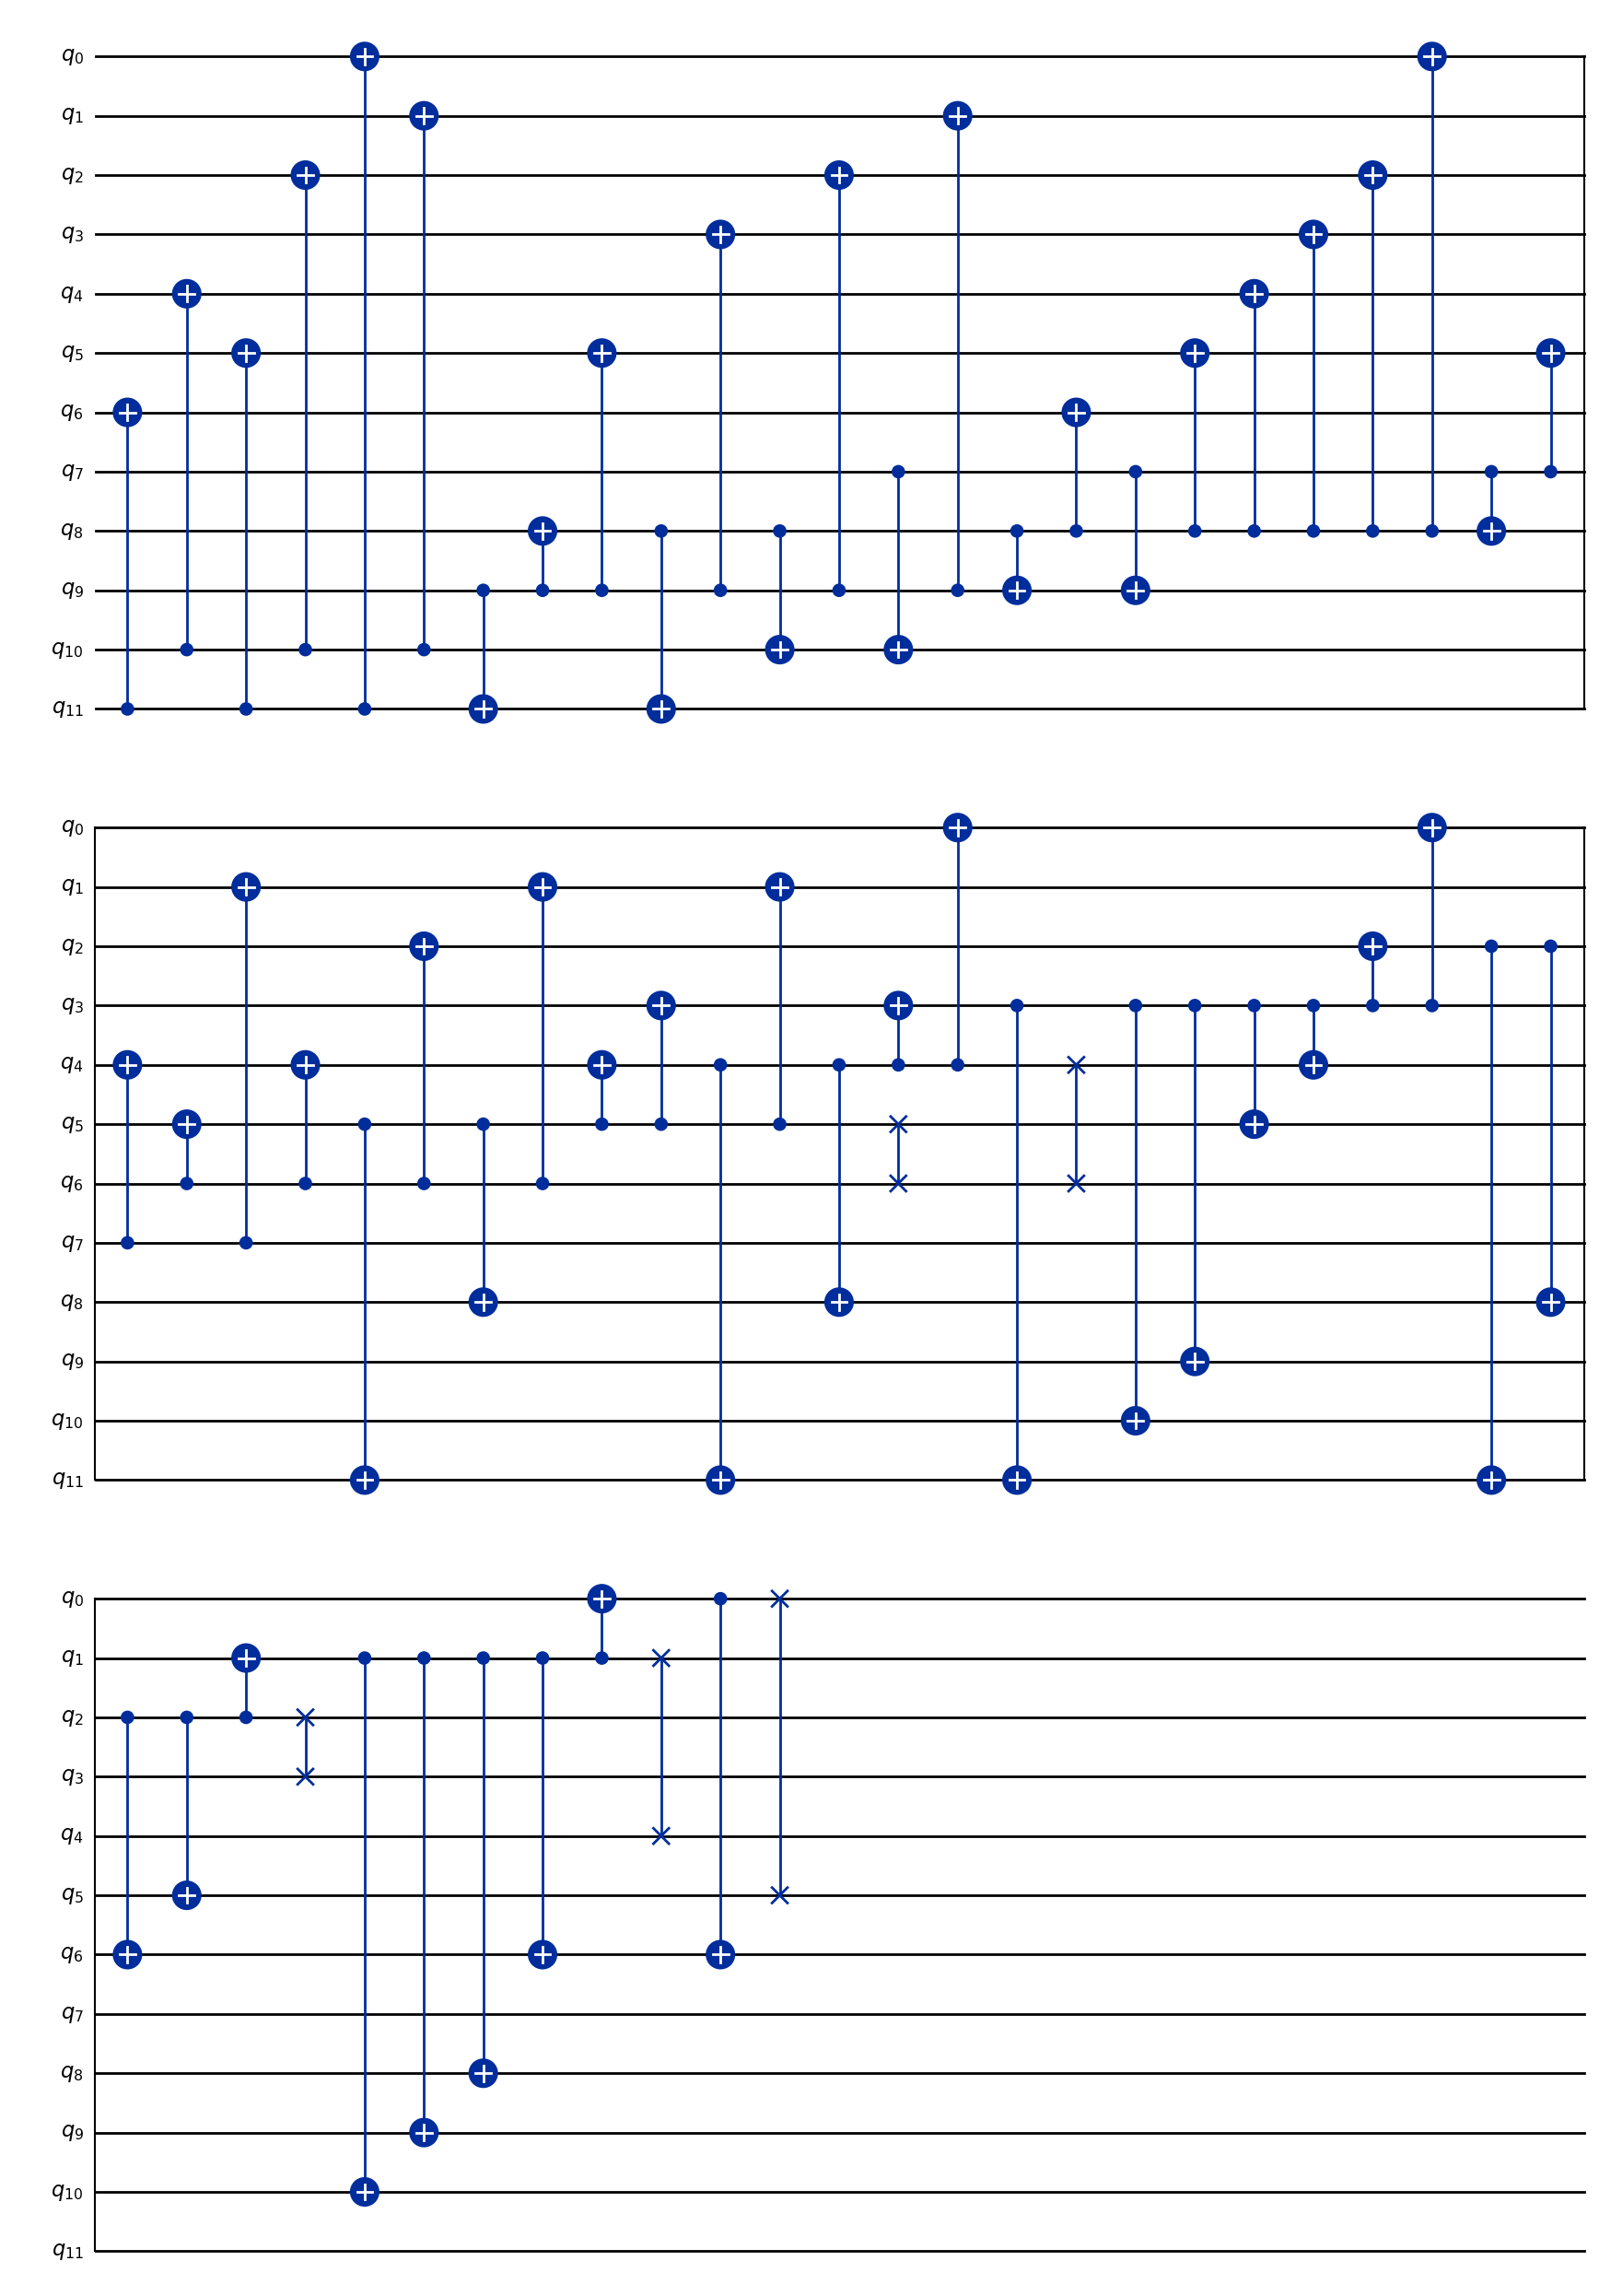

In [13]:
# logical circuit
qc = construct_circuit(logical_circuits[4], k)
qc.draw(output='mpl')

### Logical action 6

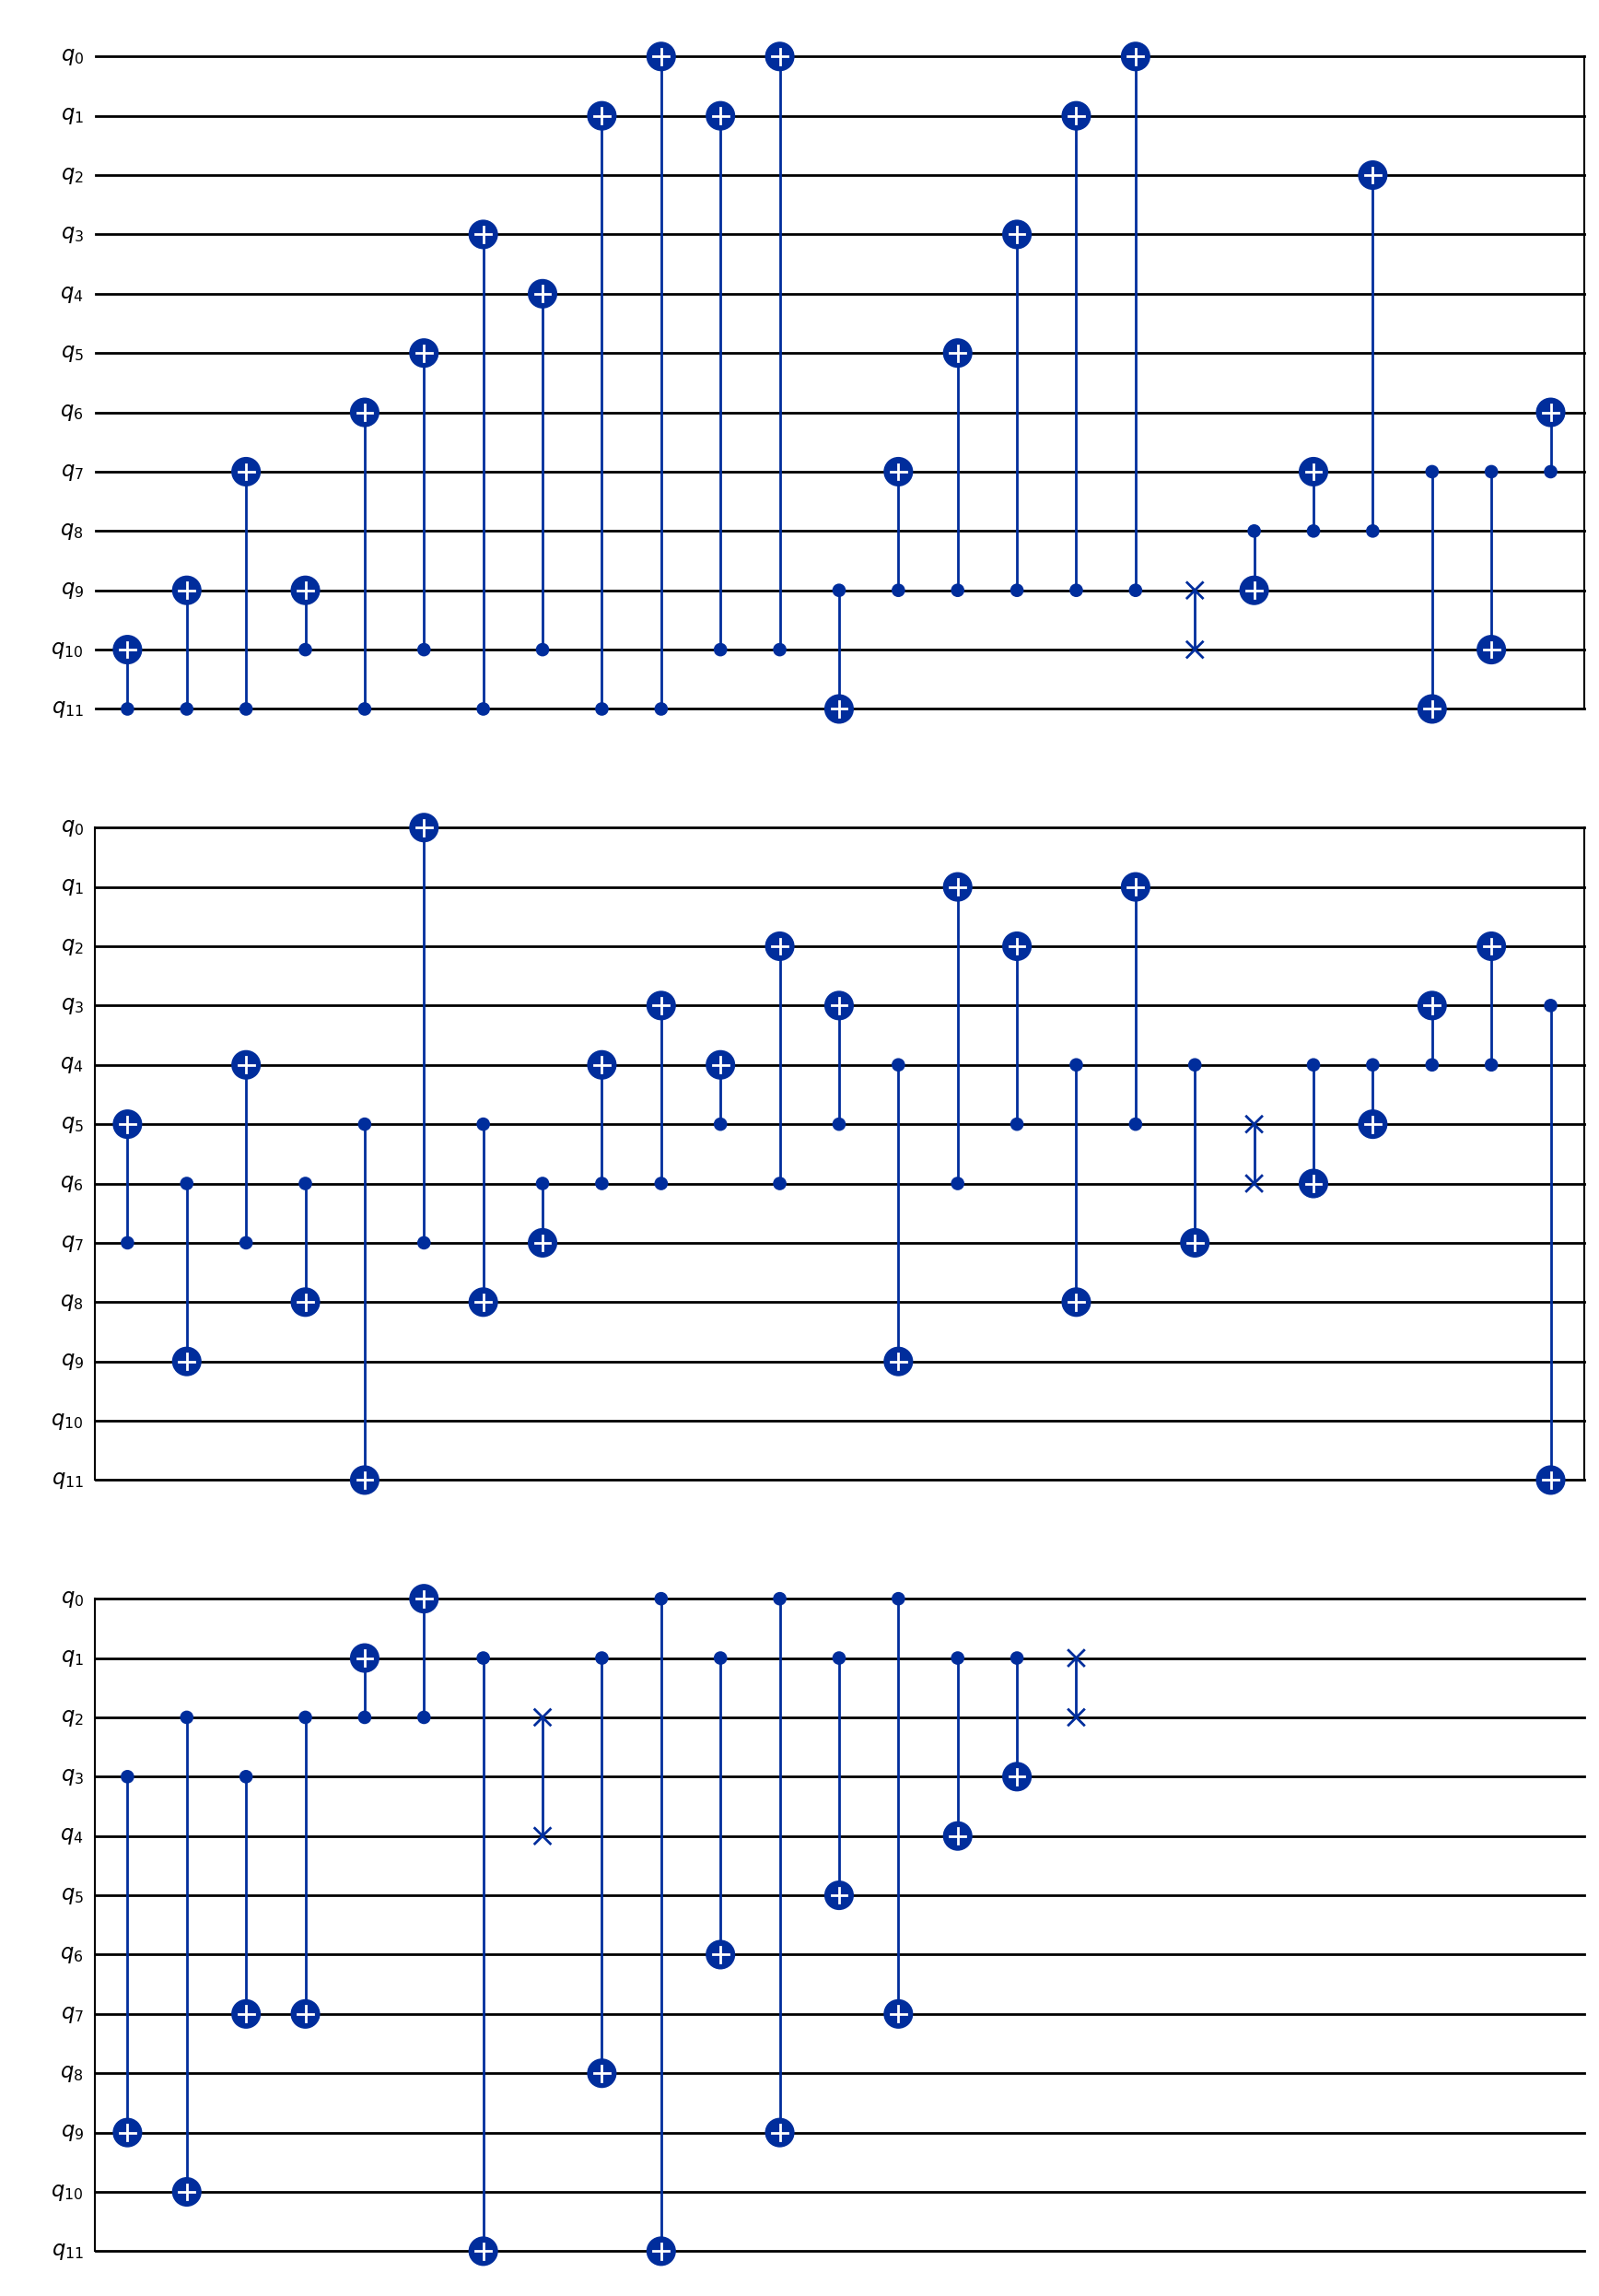

In [14]:
# logical circuit
qc = construct_circuit(logical_circuits[5], k)
qc.draw(output='mpl')

### Logical action 7

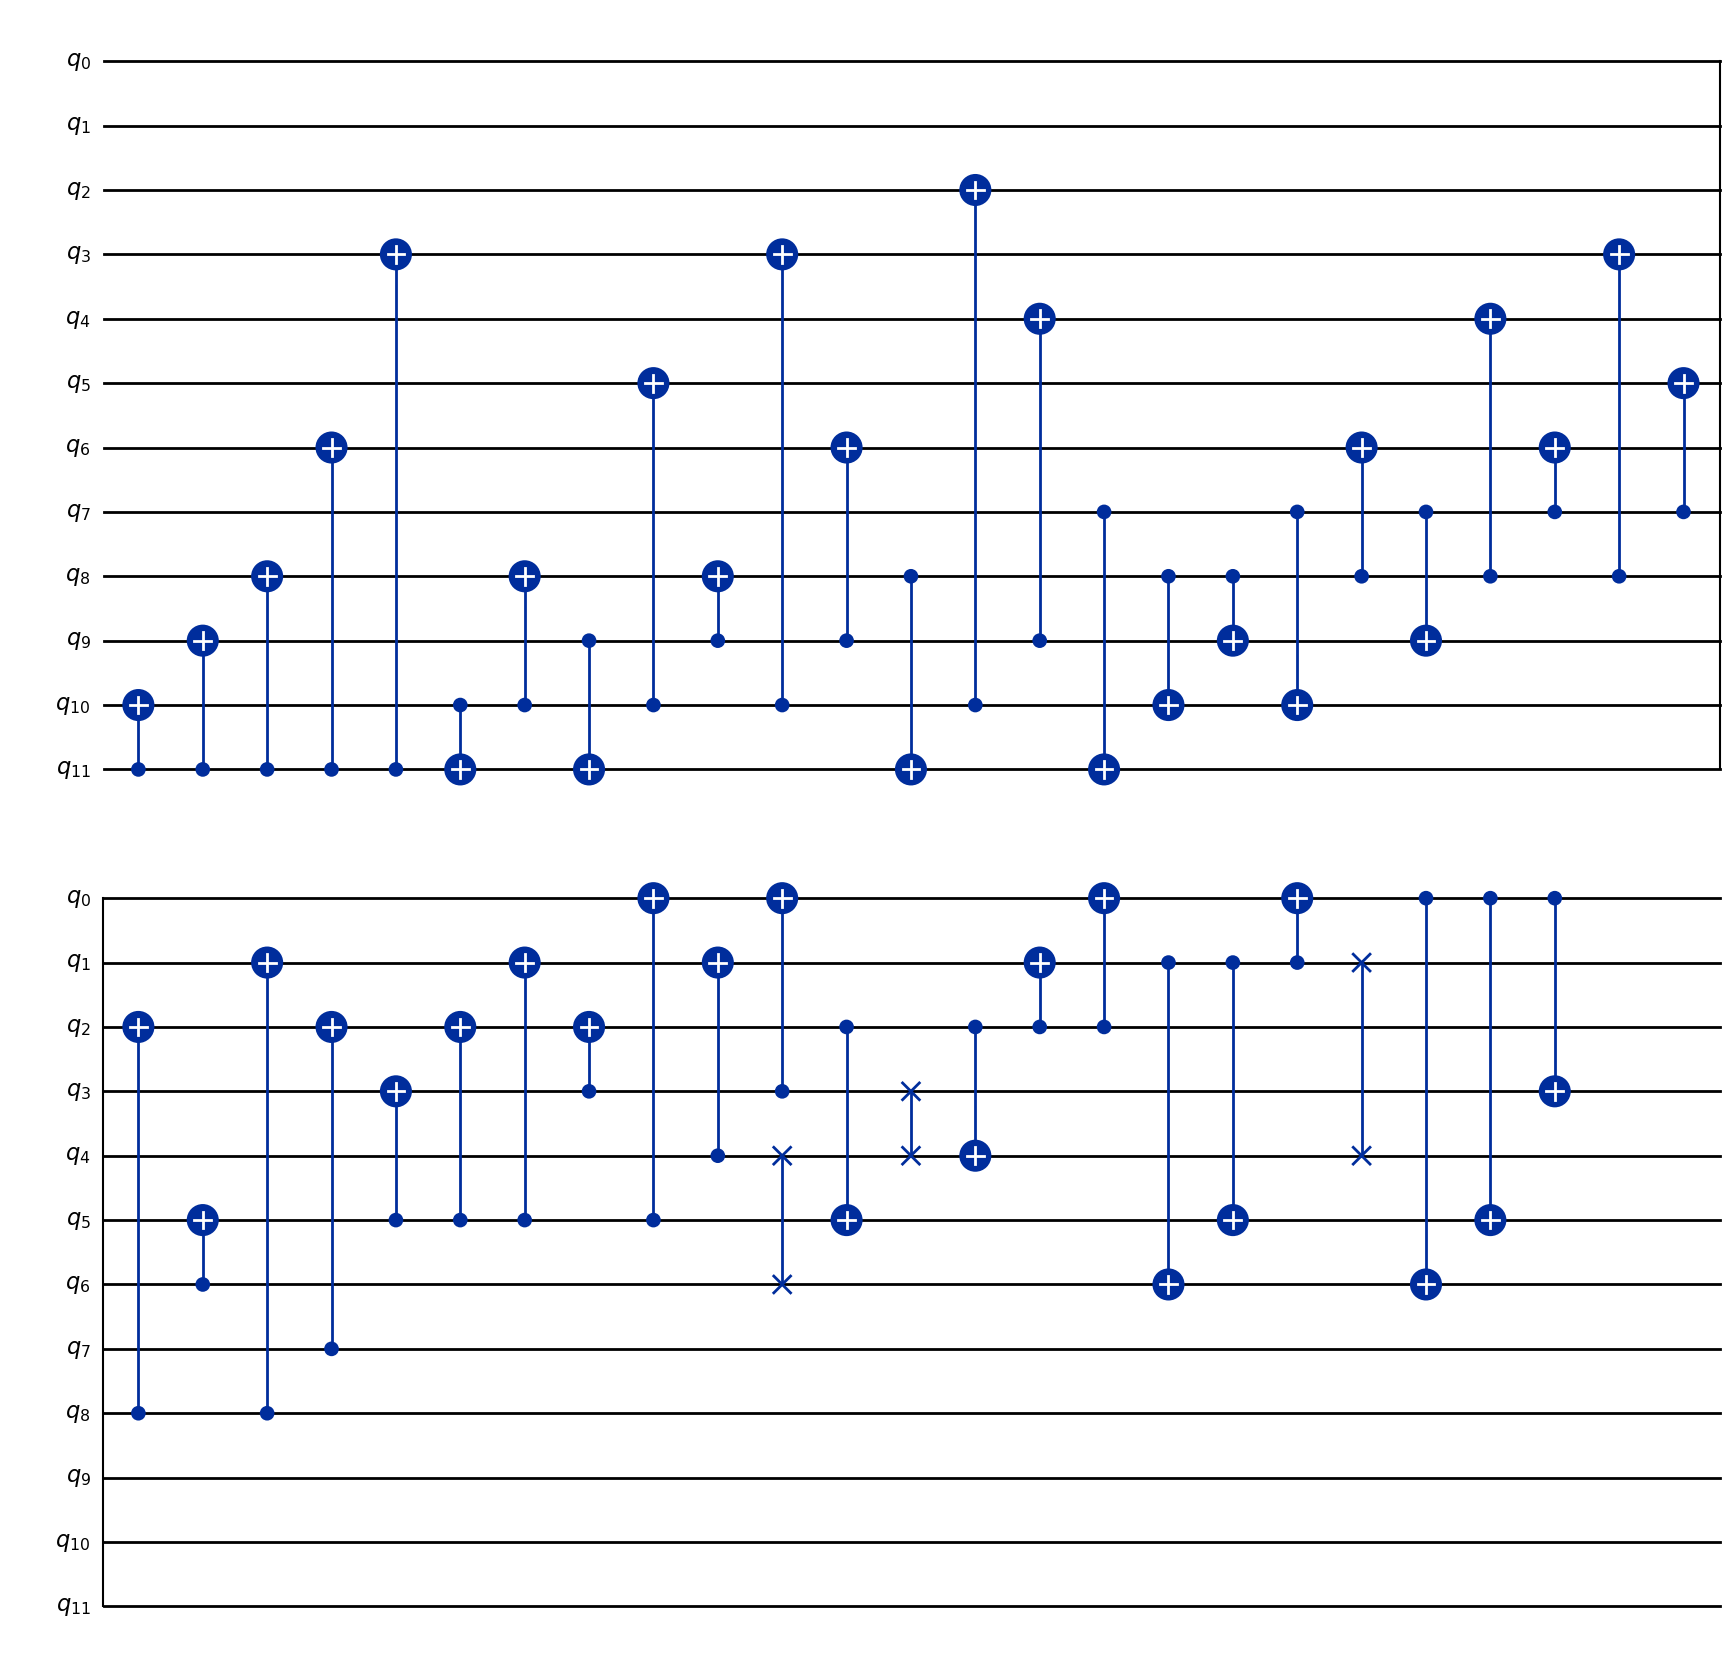

In [15]:
# logical circuit
qc = construct_circuit(logical_circuits[6], k)
qc.draw(output='mpl')

In [16]:
filename = f'./symp_mats_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    symp_mats = pickle.load(f)

In [18]:
from logical_subgroups import *
gate_group = clifford_subgroups(k,symp_mats)
print(gate_group.return_order())
print(gate_group.return_structure())

864
C2^2.S3^3
